# Business Decision Research - Sport Center

Sport Center merupakan suatu toko yang menjual sejumlah peralatan olahraga seperti Jaket, Baju, Tas, dan Sepatu. Toko ini telah beroperasi sejak tahun 2013, dengan demikian memiliki pelanggan tetap hingga tahun 2019 dan terus meningkatkan pelanggan baru hingga saat ini.

Masalah yang dihadapi ialah untuk memecahkan customer yang sudah tidak belanja atau membeli di toko sport center (churn) ketika dia sudah tidak bertransaksi ke tokonya lagi sampai dengan 6 bulan terakhir dari update data terakhir yang tersedia.  

Kami disediakan data time series transaksi dari tahun 2013 sampai dengan 2019 dalam bentuk csv (comma separated value) dengan data_retail.csv dengan jumlah baris 100.000 baris data.

# Hal yang akan dilakukan?

Data preparation test
1. Importing data: Melakukan import data_retail.csv ke python environment.
2. Cleansing data: Melakukan pembersihan dan modifikasi data sehingga siap digunakan untuk analisis lebih lanjut.
3. Data visualization test: Mendapatkan insight dari hasil visualisasi yang telah dibuat.
4. Basic stats method test: Mendapatkan insight dari model dan evaluasi model yang sudah dibuat dan diuji.

# Melakukan Importing Data

In [145]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

#melihat data lima teratas
print('Lima data teratas:')
print(df.head())

#Melihat informasi umum dari suatu data
print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      ----

# Membersihkan Data

First_Transaction dan Last Transaction memiliki data integer, hal ini dapat mengganggu jalannya pengolahan data ketika dilanjutkan. Maka kedua kolom tersebut perlu diubah tipe datanya menjadi datetime dengan menggunakan fungsi pd.to_datetime

In [146]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000040                     1467681                 22  
1 2018-12-25 11:02:41.269999981                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000013                      722632                 27  
4 2018-11-22 12:53:41.529999970                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries,

# Pelanggan yang Berpindah (Churn)

Sesuai kesepakatan definisi perpindahan pelanggan ialah suatu pelanggan yang sudah tidak membeli ke toko sport center selama 6 bulan terakhir.

Hal yang perlu dilakukan ialah 
1. mengecek data transaksi terakhir
2. Mengklasifikasikan pelanggan yang berpindah atau tidak

In [147]:
# Mengecek data transaksi terakhir dalam dataset yang diberikan
print(max(df['Last_Transaction']))

# Mengklasifikasikan pelanggan yang berpindah atau tidak dengan melabelkan "True" dan "False"
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] >'2018-08-01', 'is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000013
Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False

# Melihat Daftar Perpindahan Pelanggan (False atau True)

In [148]:
df['is_churn']

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996     True
99997     True
99998     True
99999    False
Name: is_churn, Length: 100000, dtype: object

# Mengubah kolom menjadi Numerik

In [149]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Mengkonversi Kolom Bulan
LE = LabelEncoder()
df['is_churn'] = LE.fit_transform(df['is_churn'])
print(LE.classes_)
print(np.sort(df['is_churn'].unique()))
print('')

[False True]
[0 1]



# Melakukan Penghapusan Kolom yang Tidak Diperlukan

In [150]:
# Menghaspus kolom
del df['no']
del df['Row_Num']

# Melihat lima data teratas
print(df.head())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction  is_churn  
0                 22         0  
1                 41         0  
2                 30         0  
3                 27         0  
4                 25         0  


# Melihat Trend Akuisisi Pelanggan Berdasarkan Tahun

Membuat fitur atau kolom tambahan First_Transaction dan tahun dari Last_Transaction dengan nama Year_First_Transaction dan Year_Last_Transaction

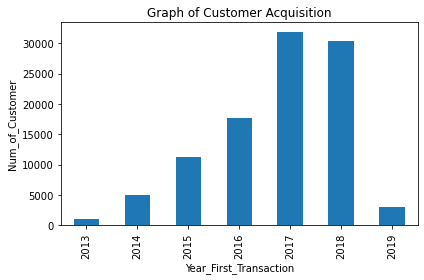

In [151]:
import matplotlib.pyplot as plt

# Penambahan kolom transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Penambahan kolom transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

# Melihat Trend Transaksi Pelanggan Berdasarkan Tahun

Melakukan visualisasi transaksi pelanggan menggunakan bar chart

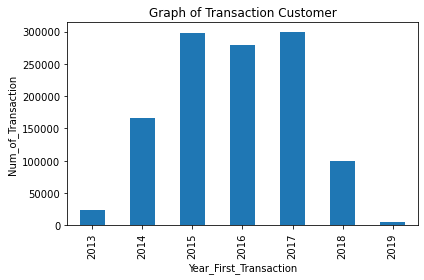

In [152]:
import matplotlib.pyplot as plt

plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

# Jumlah transaksi rata-rata berdasarkan tahun

Melakukan visualisasi data dengan menggunakan fungsi visual seaborn pointplot

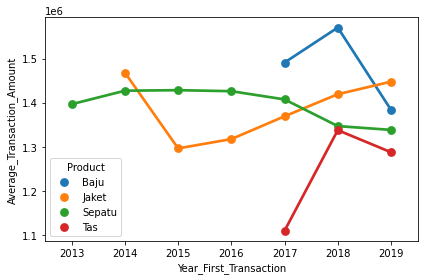

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

# Melihat Proporsi Perpindahan customer untuk setiap produk

Agar lebih terlihat jelas, proporsi di visualisasikan dalam bentuk pie chart.

<Figure size 432x288 with 0 Axes>

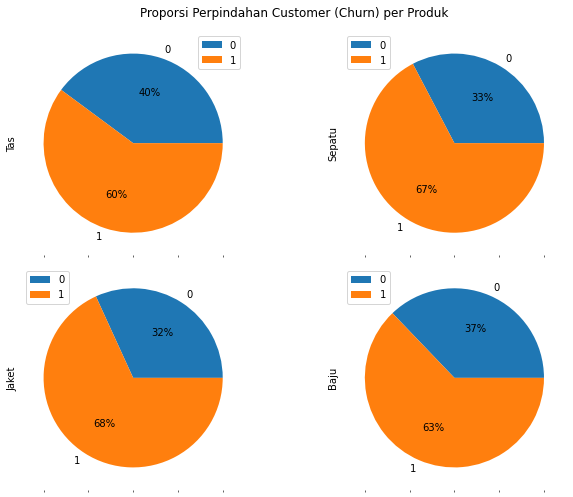

In [155]:
import matplotlib.pyplot as plt

plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proporsi Perpindahan Customer (Churn) per Produk')
plt.tight_layout()
plt.show()

# Distribusi Kategorisasi Berdasarkan Jumlah Transaksi

Selanjutnya akan melakukan visualisasi dari distribusi kategorisasi count transaction. Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi 

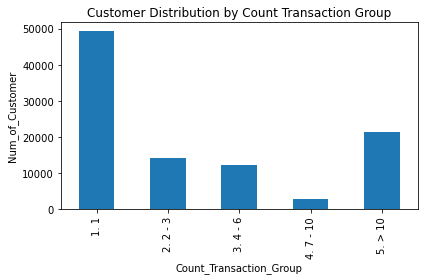

In [156]:
import matplotlib.pyplot as plt

plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3. 4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. > 10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

# Distribusi Kategorisasi rata-rata Jumlah Transaksi

melakukan visualisasi dari distribusi kategorisasi rata-rata jumlah transaksi. Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi 

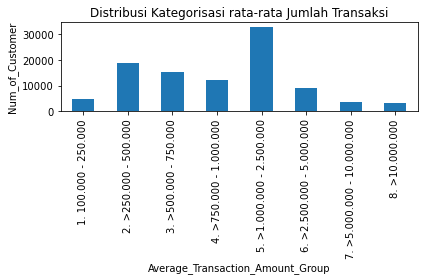

In [157]:
import matplotlib.pyplot as plt
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Distribusi Kategorisasi rata-rata Jumlah Transaksi')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

# Pembuatan Kolom untuk Model

Menentukan kolom dari dataset yang dimiliki, di sini dipilih kolom Average_Transaction_Amount, Count_Transaction, dan Year_Diff. Namun, kolom terakhir belum ada. Maka perlu dibuat kolom Year_Diff ini dan kemudian assign dataset dengan feature columns ini sebagai variabel independent X  dan untuk target tentunya persoalan costumer dengan kondisi churn atau tidak, assign dataset untuk target ini ke dalam variabe dependent y.

In [158]:
# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns]

# Target variable
y = df['is_churn']

# Melakukan Split X dan y untuk Training dan Testing

Setelah variabel independent X dan variabel dependent y selesai dilakukan, maka dipecah X dan y ke dalam bagian training dan testing. Bagian testing 25% dari jumlah entri data.

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Melakukan Pelatihan, Prediksi dan Evaluasi Data 

Membuat model menggunakan Logistic Regression, dengan membuat model, dan melakukan fit pada model, dan kemudian evaluasi model dengan menggunakan confusion matrix.

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


# Melakukan Visualisasi Confusion Matrix

Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn

<Figure size 432x288 with 0 Axes>

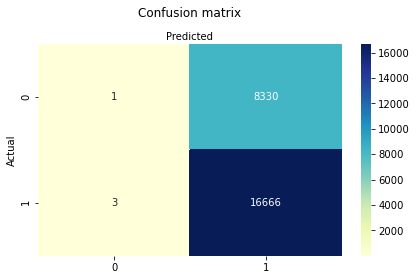

In [161]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()

# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Menghitung Accuracy, Precision, dan Recall

hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall : 0.66668
